# Fahrradmessstellen Ergebnisse Radzählungen 2022

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('FahrradBonn2022.csv', sep=';', low_memory=False)

#Informationen für später
zaehlstellennamen = list(set(df.columns))
kanalnamen = df.iloc[0].tolist()[1:]
messzeiten = pd.to_datetime(df['Zählstellenname'][1:])                                   #Nur Datum/Uhrzeit

#Bessere Lesbarkeit/Zugriff
df = df.iloc[1:,1:].reset_index(drop=True)
df.set_index(messzeiten, inplace=True)
df.index.name = 'Datum/Uhrzeit'
df.columns = kanalnamen

df = df.applymap(lambda x: -1 if pd.isna(x) else x).astype(int)
#Summenspalten entfernen und gleichnamige Spalten zusammenfassen
df = df.drop(columns=kanalnamen[74:76] + kanalnamen[72:74] + kanalnamen[58:60], axis=1)
df = df.groupby(df.columns, axis=1).sum()

#Alle Sensoren/Kanäle pro Standort
kanalnamen = df.columns
standorte = {'Kennedybrücke' : kanalnamen[0:8],
             'Nordbrücke': kanalnamen[8:16],
             'Südbrücke': kanalnamen[16:24],
             'Estermannufer' : kanalnamen[24:28],
             'Von-Sandt-Ufer' : kanalnamen[28:32],
             'Rhenusallee' : kanalnamen[32:36],
             'Bröhltalweg' : kanalnamen[36:40],
             'Brühler Straße' : kanalnamen[40:44],
             'Straßburger Weg' : kanalnamen[44:46],
             'Wilhelm-Spiritus-Ufer' : kanalnamen[46:48],
             'Mc Cloy Weg' : kanalnamen[48:50],
             'Weg auf Damm Neil' : kanalnamen[50:52]
             }
df

,5.01 BN - Kennedybrücke (Nordseite) Radfahrer Ri. Beuel,5.01 BN - Kennedybrücke (Nordseite) Radfahrer Ri. Innenstadt,5.01 BN - Kennedybrücke (Nordseite) [Bike IN],5.01 BN - Kennedybrücke (Nordseite) [Bike OUT],5.02 BN - Kennedybrücke (Südseite) Barometer Radfahrer Ri. Beuel,5.02 BN - Kennedybrücke (Südseite) Barometer [Bike IN],5.02 BN - Kennedybrücke (Südseite) Barometer [Bike OUT],5.02 BN - Kennedybrücke (Südseite) IN,5.03 BN - Nordbrücke (Südseite) Radfahrer Ri. Auerberg,5.03 BN - Nordbrücke (Südseite) Radfahrer Ri. Beuel,...,5.11 BN - Brühler Straße [Bike IN],5.11 BN - Brühler Straße [Bike OUT],5.12 BN - Straßenburger Weg Radfahrer Ri. Norden,5.12 BN - Straßenburger Weg Radfahrer Ri. Süden,5.13 BN - Wilhelm-Spiritus-Ufer Radfahrer Ri. Norden,5.13 BN - Wilhelm-Spiritus-Ufer Radfahrer Ri. Süden,5.14 BN - Mc Cloy Weg Radfahrer Ri. Bonn,5.14 BN - Mc Cloy Weg Radfahrer Ri. Remagen,5.15 BN - Weg auf Damm Neil Radfahrer Ri. Norden,5.15 BN - Weg auf Damm Neil Radfahrer Ri. Süden
Datum/Uhrzeit,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0,0,0,1,0,2,3,0,0,0,...,0,0,-1,-1,2,0,0,0,0,0
2022-01-01 00:15:00,0,0,1,2,1,2,1,0,0,0,...,1,0,-1,-1,2,2,0,0,0,0
2022-01-01 00:30:00,0,0,2,2,0,1,2,1,0,0,...,1,2,-1,-1,2,1,0,0,0,1
2022-01-01 00:45:00,0,0,5,5,0,0,7,0,0,0,...,0,0,-1,-1,1,2,2,1,0,1
2022-01-01 01:00:00,0,1,5,0,0,5,15,0,0,1,...,1,0,-1,-1,0,1,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 22:45:00,0,0,5,2,1,3,14,0,0,0,...,0,0,-1,-1,1,4,1,0,2,2
2022-12-31 23:00:00,0,0,5,1,0,3,14,0,0,0,...,0,0,-1,-1,0,2,2,4,2,1
2022-12-31 23:15:00,0,0,2,0,0,0,7,0,0,0,...,1,1,-1,-1,0,0,0,0,1,2


In [3]:
percentage_negative = ((df < 0).sum() / df.count()) * 100
percentage_negative

5.01 BN - Kennedybrücke (Nordseite) Radfahrer Ri. Beuel              31.643836
5.01 BN - Kennedybrücke (Nordseite) Radfahrer Ri. Innenstadt         31.643836
5.01 BN - Kennedybrücke (Nordseite) [Bike IN]                        31.643836
5.01 BN - Kennedybrücke (Nordseite) [Bike OUT]                       31.643836
5.02 BN - Kennedybrücke (Südseite) Barometer Radfahrer Ri. Beuel      0.011416
5.02 BN - Kennedybrücke (Südseite) Barometer [Bike IN]                0.011416
5.02 BN - Kennedybrücke (Südseite) Barometer [Bike OUT]               0.011416
5.02 BN - Kennedybrücke (Südseite) IN                                 0.011416
5.03 BN - Nordbrücke (Südseite) Radfahrer Ri. Auerberg                0.011416
5.03 BN - Nordbrücke (Südseite) Radfahrer Ri. Beuel                   0.011416
5.03 BN - Nordbrücke (Südseite) [Bike IN]                             0.011416
5.03 BN - Nordbrücke (Südseite) [Bike OUT]                            0.011416
5.04 BN - Nordbrücke (Nordseite) Radfahrer Ri. Auerb

## Daten für weitere Verarbeitung

In [4]:
df_standorte_total = pd.DataFrame()
for standort,kanäle in standorte.items():
    df_standorte_total[standort] = df[kanäle].sum(axis=1)

order = ['Kennedybrücke', 'Nordbrücke', 'Südbrücke', 'Estermannufer', 'Von-Sandt-Ufer', 'Rhenusallee', 
         'Brühler Straße', 'Wilhelm-Spiritus-Ufer', 'Mc Cloy Weg', 'Weg auf Damm Neil']
df_standorte_total = df_standorte_total[order]
df_standorte_total = df_standorte_total.resample('H').sum()
df_standorte_total

,Kennedybrücke,Nordbrücke,Südbrücke,Estermannufer,Von-Sandt-Ufer,Rhenusallee,Brühler Straße,Wilhelm-Spiritus-Ufer,Mc Cloy Weg,Weg auf Damm Neil
Datum/Uhrzeit,,,,,,,,,,
2022-01-01 00:00:00,38,5,17,0,12,11,8,12,3,2
2022-01-01 01:00:00,94,9,22,2,18,11,13,7,2,17
2022-01-01 02:00:00,97,5,27,3,7,18,7,9,6,21
2022-01-01 03:00:00,89,5,12,1,0,9,5,9,1,8
2022-01-01 04:00:00,40,8,15,2,0,7,6,1,0,5
...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,212,16,-8,1,8,0,11,12,5,28
2022-12-31 20:00:00,125,8,-7,0,13,0,7,13,4,19
2022-12-31 21:00:00,69,8,-7,2,1,0,11,19,1,11


In [5]:
percentage_negative = ((df_standorte_total < 0).sum() / df_standorte_total.count()) * 100
percentage_negative

Kennedybrücke             7.020548
Nordbrücke                0.011416
Südbrücke                15.479452
Estermannufer             0.011416
Von-Sandt-Ufer            0.011416
Rhenusallee               0.011416
Brühler Straße            0.011416
Wilhelm-Spiritus-Ufer     0.011416
Mc Cloy Weg               0.011416
Weg auf Damm Neil         0.011416
dtype: float64

## Höchste Zählungen

In [5]:
#Höchste Messung pro Kanal mit Datum:
hoechste_zaehlungen = pd.concat([df.idxmax(), df.max()], axis=1)
hoechste_zaehlungen.columns=['Datum/Uhrzeit', 'Höchste Zählung']

#Höchste Messung Bonn/2022
die_hoechste_zahl = hoechste_zaehlungen.loc[hoechste_zaehlungen['Höchste Zählung'].idxmax()]

print(die_hoechste_zahl)
hoechste_zaehlungen

Datum/Uhrzeit      2022-08-30 23:00:00
Höchste Zählung                    474
Name: 5.02 BN - Kennedybrücke (Südseite) Barometer [Bike OUT], dtype: object


,Datum/Uhrzeit,Höchste Zählung
5.01 BN - Kennedybrücke (Nordseite) Radfahrer Ri. Beuel,2022-01-13 16:15:00,9
5.01 BN - Kennedybrücke (Nordseite) Radfahrer Ri. Innenstadt,2022-01-13 16:15:00,26
5.01 BN - Kennedybrücke (Nordseite) [Bike IN],2022-05-09 07:30:00,146
5.01 BN - Kennedybrücke (Nordseite) [Bike OUT],2022-02-01 07:30:00,82
5.02 BN - Kennedybrücke (Südseite) Barometer Radfahrer Ri. Beuel,2022-10-07 12:15:00,39
5.02 BN - Kennedybrücke (Südseite) Barometer [Bike IN],2022-05-31 07:45:00,99
5.02 BN - Kennedybrücke (Südseite) Barometer [Bike OUT],2022-08-30 23:00:00,474
5.02 BN - Kennedybrücke (Südseite) IN,2022-07-10 20:00:00,20
5.03 BN - Nordbrücke (Südseite) Radfahrer Ri. Auerberg,2022-04-18 15:00:00,13
5.03 BN - Nordbrücke (Südseite) Radfahrer Ri. Beuel,2022-08-16 07:45:00,27


## Zählungen an der Kennedybrücke über das ganze Jahr

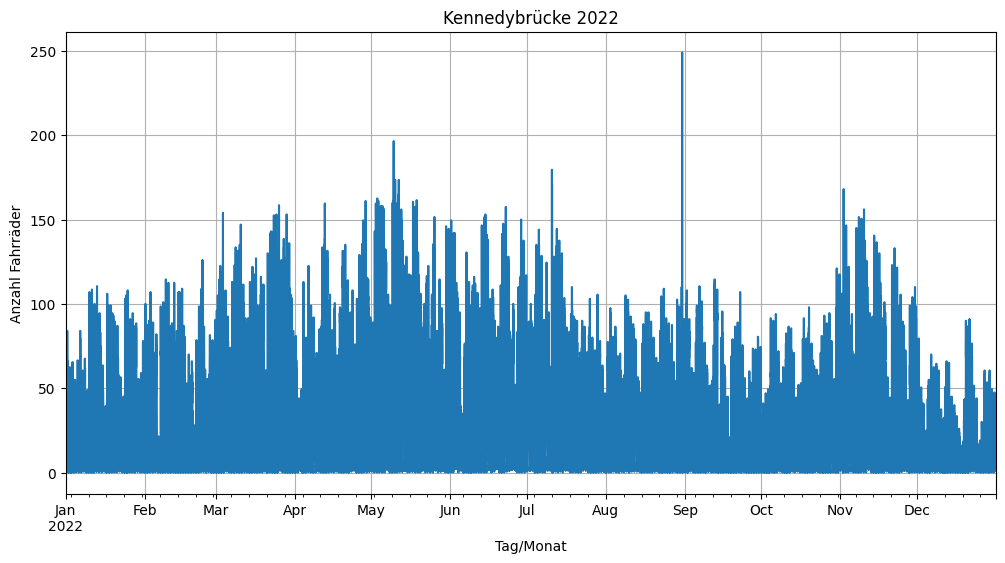

Radfahrer auf der Kennedybrücke am 30/08/22 um 23 Uhr: 249.0


In [6]:
kennedy = df_standorte_gewichtet[['5.01 Kennedybrücke Nord', '5.02 Kennedybrücke Süd']].sum(axis=1)

plt.figure(figsize=(12,6))
kennedy.plot()
plt.title('Kennedybrücke 2022')
plt.ylabel('Anzahl Fahrräder')
plt.xlabel('Tag/Monat')
plt.grid()
plt.show()

print('Radfahrer auf der Kennedybrücke am 30/08/22 um 23 Uhr:',kennedy['2022-08-30 23:00:00'])

## Die Kennedybrücke am 30.08.2022
Bemerkung: Am 30.08.22 fand im Hofgarten ab 20 Uhr ein Konzert von Robbie Williams statt.

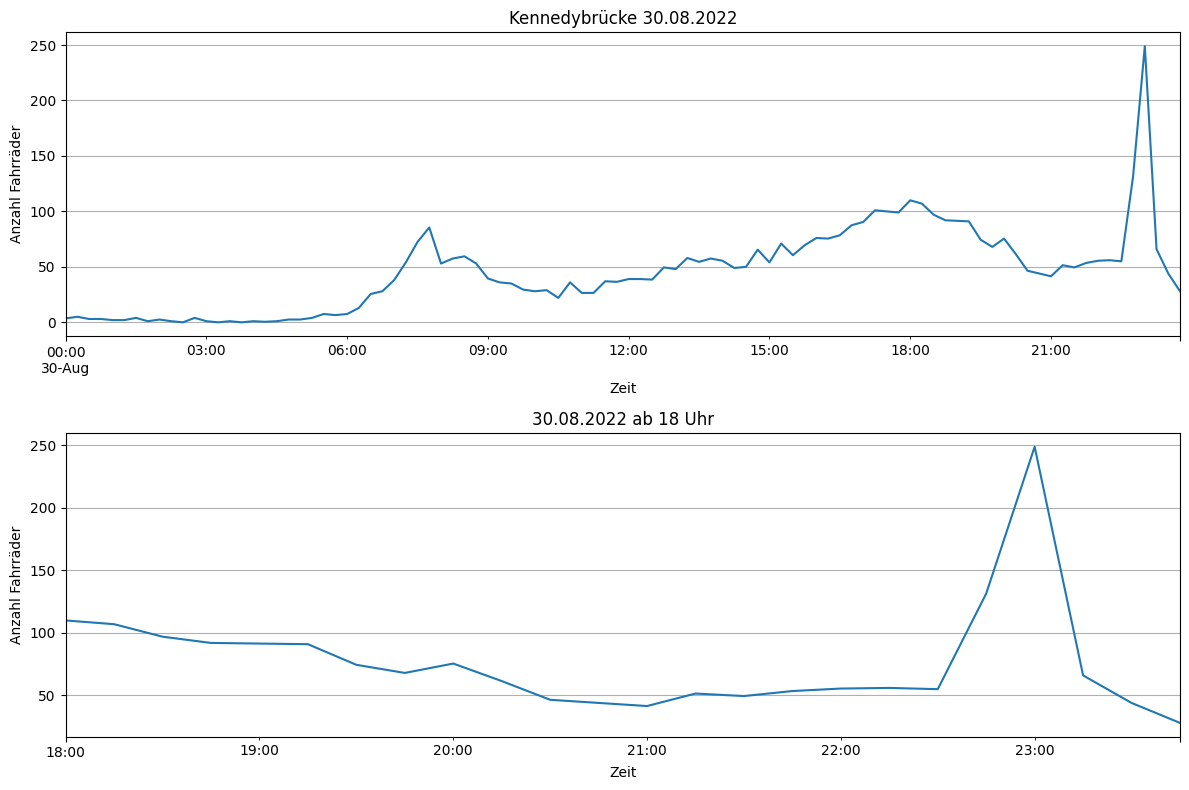

In [7]:
plt.figure(figsize=(12,8))
plt.subplot(211)
kennedy[(kennedy.index >= '2022-08-30 00:00:00') & (kennedy.index <= '2022-08-30 23:45:00')].plot()
plt.title('Kennedybrücke 30.08.2022')
plt.ylabel('Anzahl Fahrräder')
plt.xlabel('Zeit')
plt.grid()

plt.subplot(212)
kennedy[(kennedy.index >= '2022-08-30 18:00:00') & (kennedy.index <= '2022-08-30 23:45:00')].plot()
plt.title('30.08.2022 ab 18 Uhr')
plt.ylabel('Anzahl Fahrräder')
plt.xlabel('Zeit')
plt.grid()

plt.tight_layout()
plt.show()

## Zählungen zur Zeit der Kidical Mass 24.06.2022

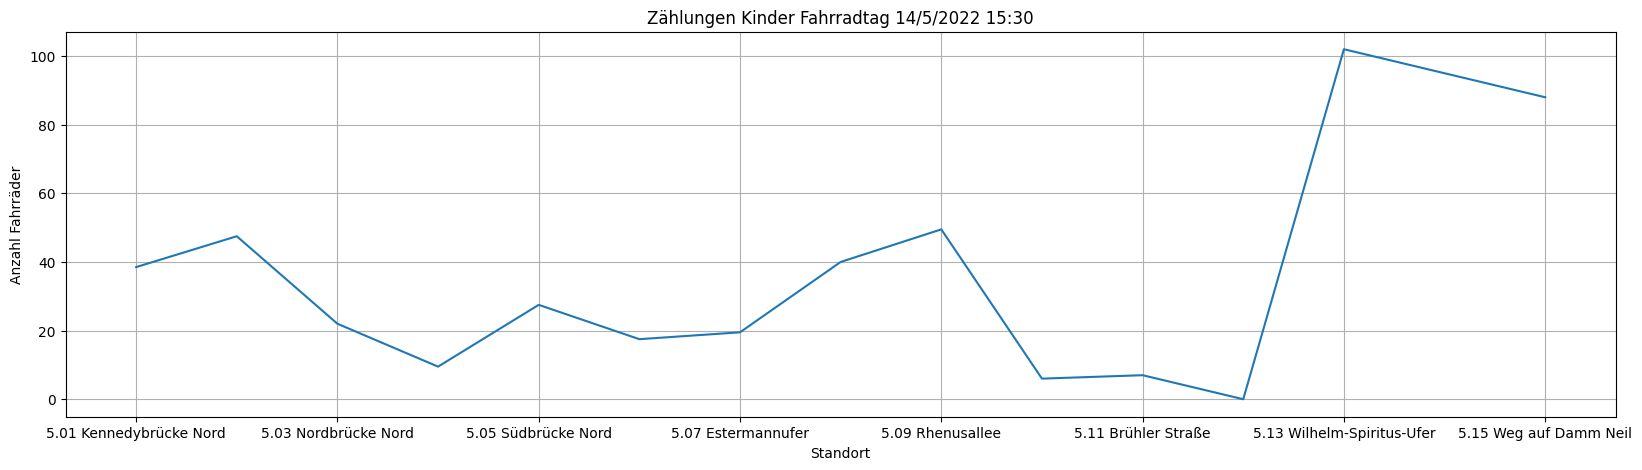

In [8]:
plt.figure(figsize=(20,5))
df_standorte_gewichtet.loc['2022-05-14 15:30:00'].plot()
plt.title('Zählungen Kinder Fahrradtag 14/5/2022 15:30')
plt.ylabel('Anzahl Fahrräder')
plt.xlabel('Standort')
plt.grid()
plt.show()

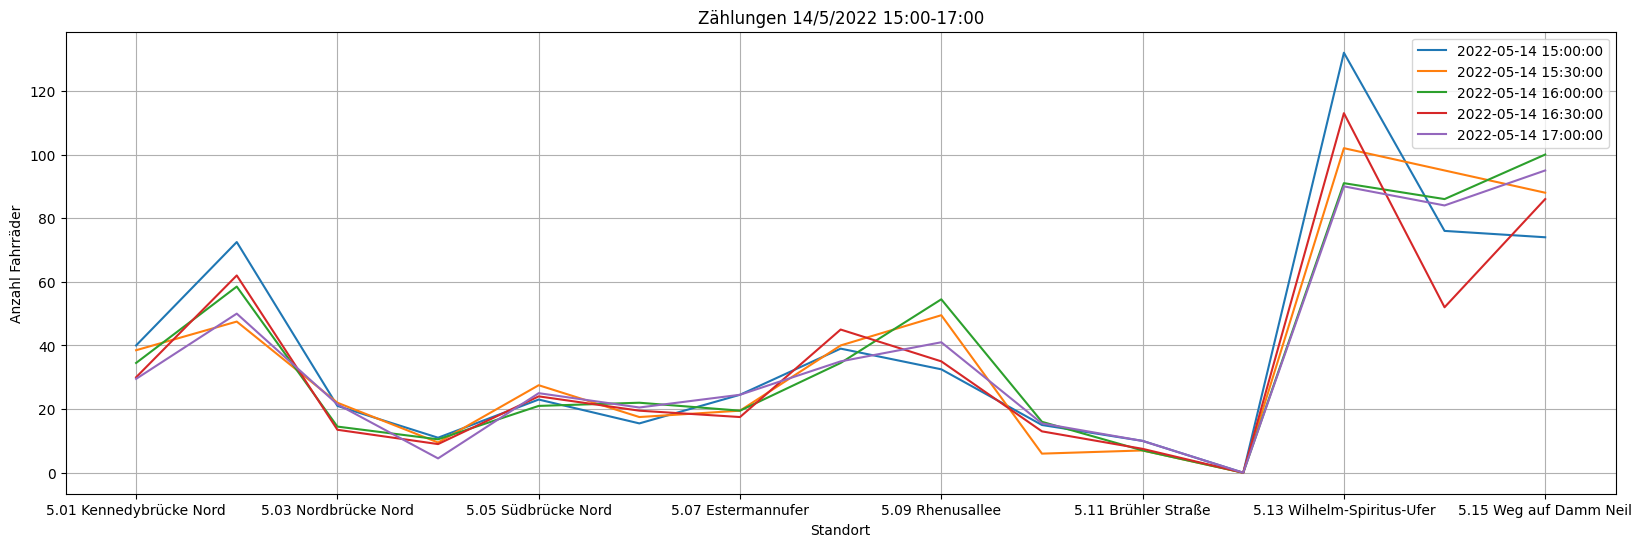

In [9]:
plt.figure(figsize=(20,6))
df_standorte_gewichtet.loc['2022-05-14 15:00:00'].plot()
df_standorte_gewichtet.loc['2022-05-14 15:30:00'].plot()
df_standorte_gewichtet.loc['2022-05-14 16:00:00'].plot()
df_standorte_gewichtet.loc['2022-05-14 16:30:00'].plot()
df_standorte_gewichtet.loc['2022-05-14 17:00:00'].plot()
plt.title('Zählungen 14/5/2022 15:00-17:00')
plt.ylabel('Anzahl Fahrräder')
plt.xlabel('Standort')
plt.legend()
plt.grid()
plt.show()

Beobachtung: 

## Zählungen über ganz Bonn (Tag/Monat/Jahreszeit) 2022

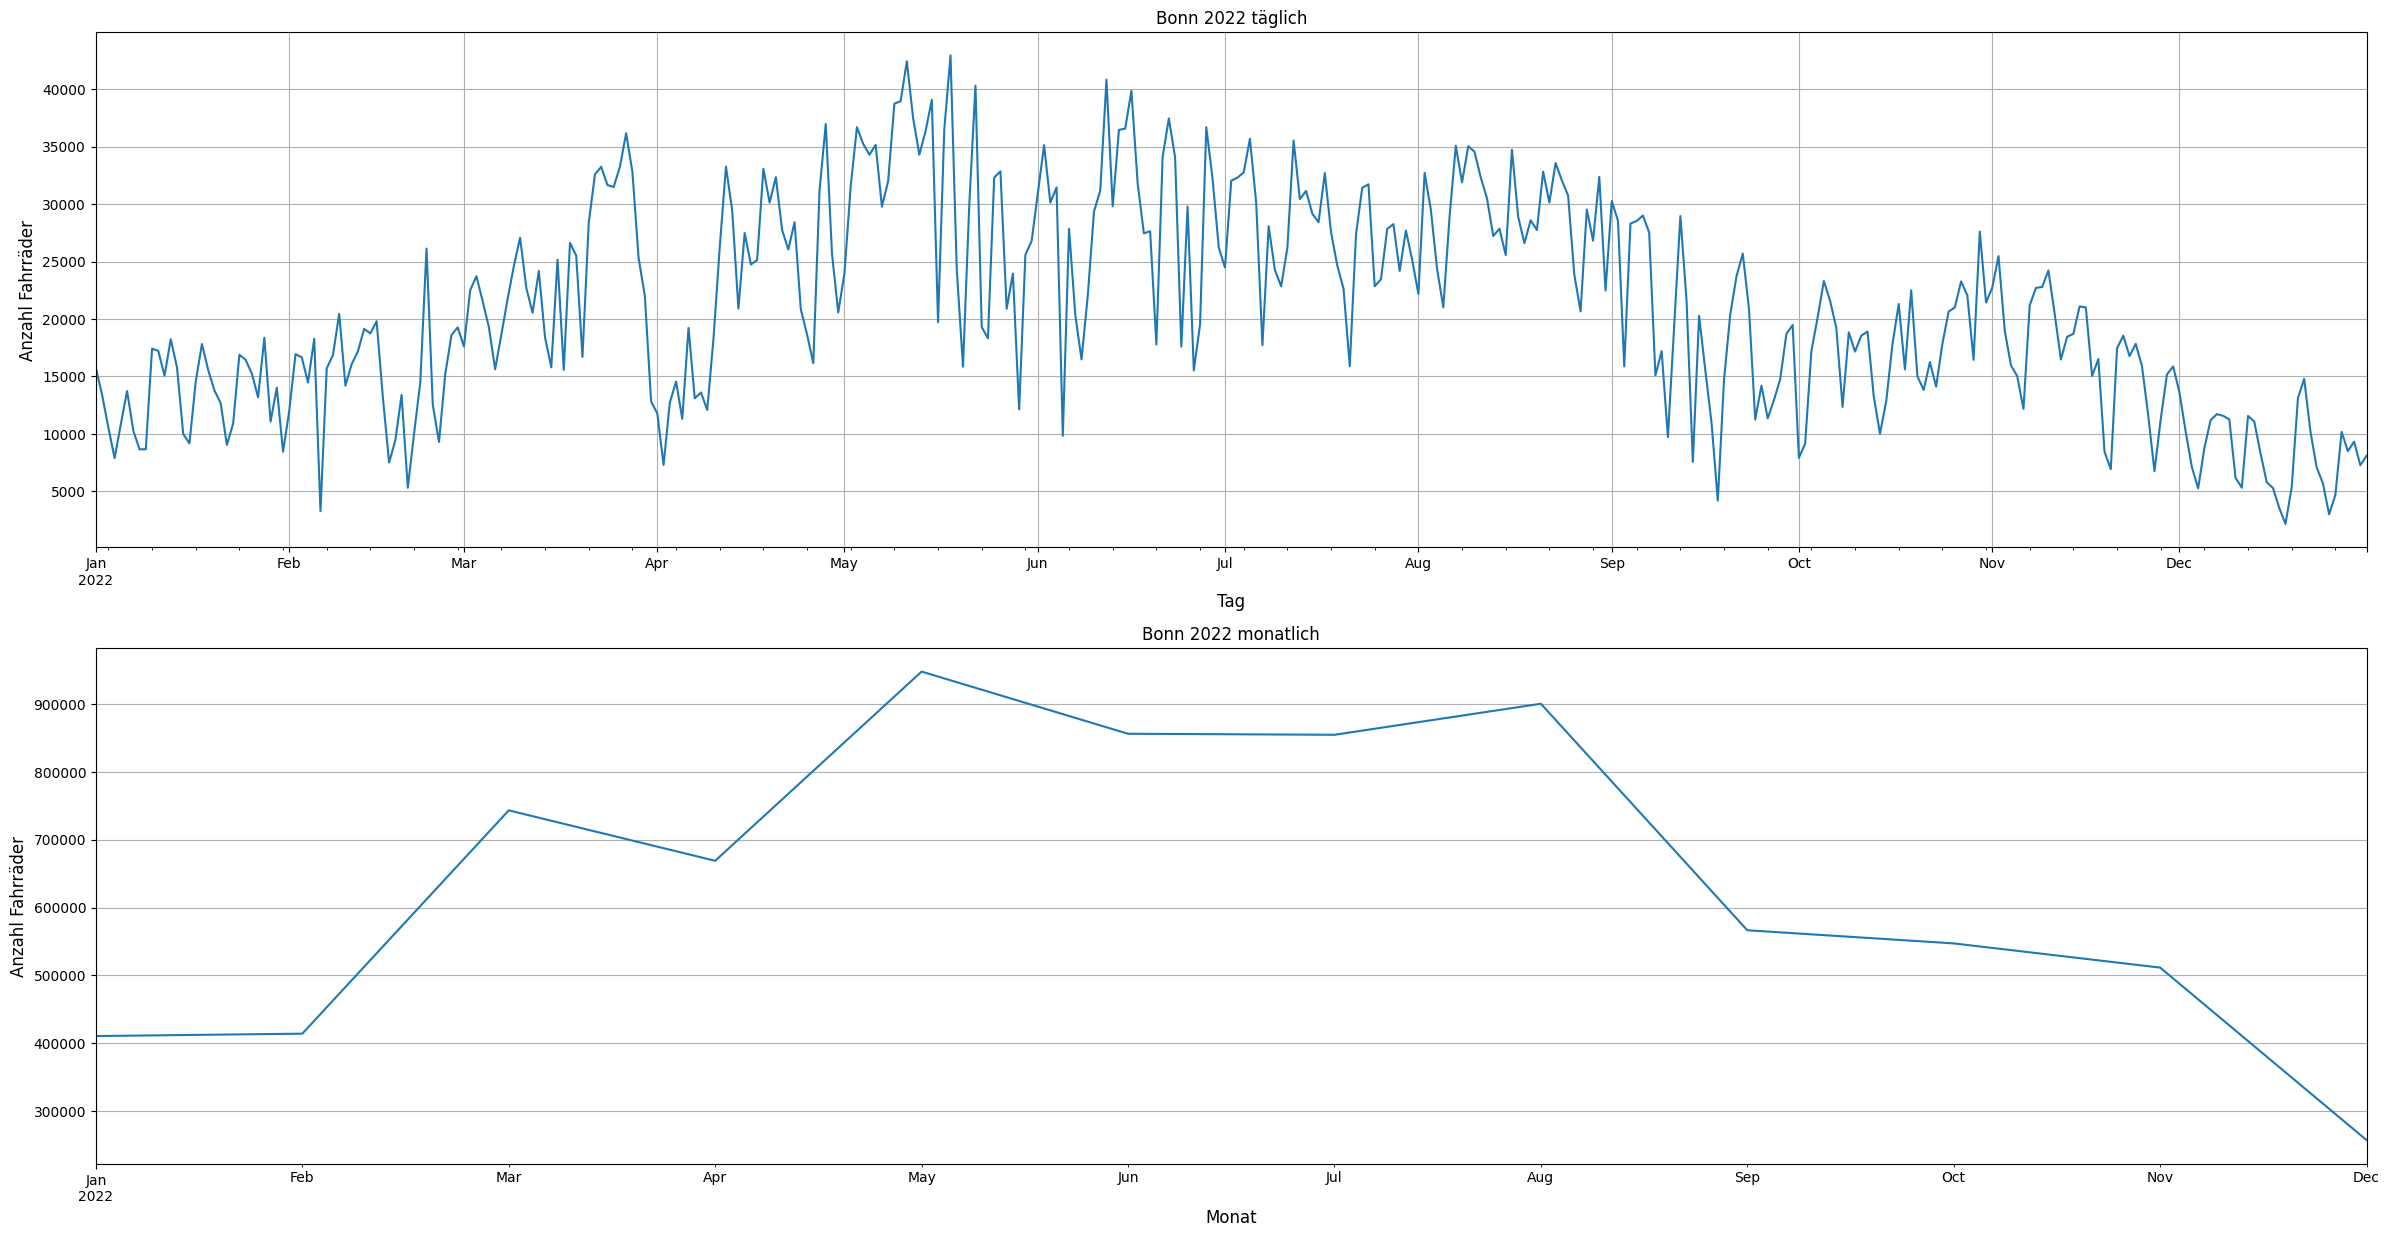

In [15]:
bonn2022_tag = df.sum(axis=1).resample('D').sum()
bonn2022_monat = bonn2022_tag.resample('M').sum()
bonn2022_jahreszeit = pd.DataFrame()
bonn2022_jahreszeit['Frühling'] = bonn2022_tag.loc[(bonn2022_tag.index >= '2022-03-21') \
                                                   & (bonn2022_tag.index < '2022-06-21')].sum()
bonn2022_jahreszeit['Sommer'] = bonn2022_tag.loc[(bonn2022_tag.index >= '2022-06-21') \
                                                 & (bonn2022_tag.index < '2022-09-23')].sum()
bonn2022_jahreszeit['Herbst'] = bonn2022_tag.loc[(bonn2022_tag.index >= '2022-09-21') \
                                                 & (bonn2022_tag.index < '2022-12-21')].sum()
bonn2022_jahreszeit['Winter'] = bonn2022_tag.loc[((bonn2022_tag.index >= '2022-12-21') \
                                                 & (bonn2022_tag.index < '2022-12-31'))
                                                 |((bonn2022_tag.index >= '2022-01-01') \
                                                 & (bonn2022_tag.index < '2022-03-21'))].sum()

plt.figure(figsize=(24,18))

plt.subplot(311)
bonn2022_tag.plot()
plt.title('Bonn 2022 täglich', fontsize='large')
plt.ylabel('Anzahl Fahrräder', fontsize='large')
plt.xlabel('Tag', fontsize='large')
plt.grid()

plt.subplot(312)
bonn2022_monat.plot()
plt.title('Bonn 2022 monatlich', fontsize='large')
plt.ylabel('Anzahl Fahrräder', fontsize='large')
plt.xlabel('Monat', fontsize='large')
plt.grid()

''''plt.subplot(312)
bonn2022_jahreszeit.plot()
plt.title('Bonn 2022 monatlich')
plt.ylabel('Anzahl Fahrräder')
plt.xlabel('Monat')
plt.grid()'''

plt.tight_layout()
plt.savefig('bonn2022_plot.jpg', format='jpg')
plt.show()

## Auszüge

In [11]:
kennedy2022 = kennedy.resample('D').sum()
%store kennedy2022 bonn2022_tag bonn2022_monat

Stored 'kennedy2022' (Series)
Stored 'bonn2022_tag' (Series)
Stored 'bonn2022_monat' (Series)


In [12]:
df_standorte_total.to_csv('df_Bonn2022.csv')
#bonn2022_tag.to_csv('Bonn2022_täglich.csv')